In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
asylum_data = pd.read_csv("Asylum Data/asylumdata.csv",low_memory=False)

In [16]:
aslymData_org = asylum_data[asylum_data['Value']!='*' ]

In [17]:
aslymData_org['Value'] = pd.to_numeric(aslymData_org['Value'], errors='coerce')

<ipython-input-17-89b9f84670d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aslymData_org['Value'] = pd.to_numeric(aslymData_org['Value'], errors='coerce')


In [43]:
aslymData_afg = aslymData_org[aslymData_org['Origin'] == 'Afghanistan']
aslymData_irq = aslymData_org[aslymData_org['Origin'] == 'Iraq']
aslymData_sry = aslymData_org[aslymData_org['Origin'] == 'Syrian Arab Rep.']
aslymData_ind = aslymData_org[aslymData_org['Origin'] == 'India']
aslymData_chn = aslymData_org[aslymData_org['Origin'] == 'China']


In [45]:
aslymData_afg_rt = (aslymData_afg.groupby('Year').sum()/1000).astype('int')
aslymData_irq_rt = (aslymData_irq.groupby('Year').sum()/1000).astype('int')
aslymData_sry_rt = (aslymData_sry.groupby('Year').sum()/1000).astype('int')
aslymData_ind_rt = (aslymData_ind.groupby('Year').sum()/1000).astype('int')
aslymData_chn_rt = (aslymData_chn.groupby('Year').sum()/1000).astype('int')

In [50]:
dyear = [str(year) for year in aslymData_chn_rt.index]

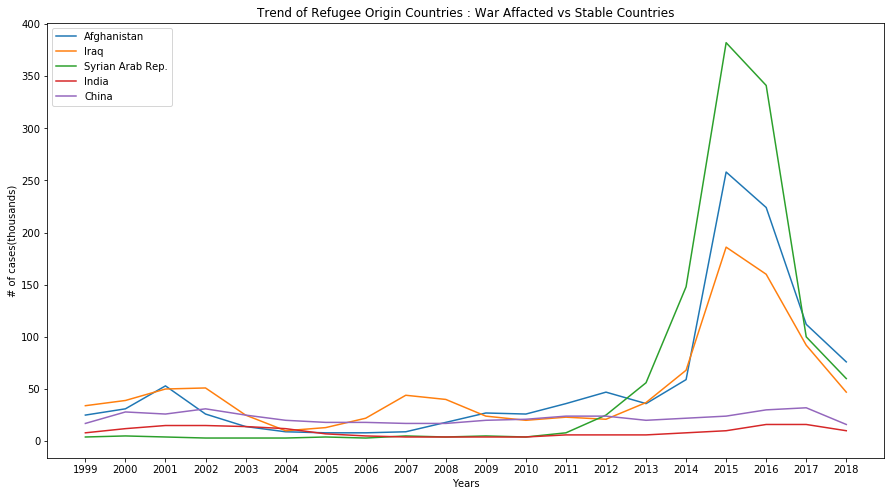

In [54]:
fig = plt.figure(figsize=(15,8))
plt.plot(dyear,aslymData_afg_rt)
plt.plot(dyear,aslymData_irq_rt)
plt.plot(dyear,aslymData_sry_rt)
plt.plot(dyear,aslymData_ind_rt)
plt.plot(dyear,aslymData_chn_rt)

plt.title("Trend of Refugee Origin Countries : War Affacted vs Stable Countries")
plt.xlabel("Years")
plt.ylabel("# of cases(thousands)")
plt.legend(["Afghanistan","Iraq","Syrian Arab Rep.","India","China"])
plt.show()

In [83]:
aslymData_sry_ht = aslymData_sry[aslymData_sry['Year']>2013] 


In [111]:
aslymData_sry_ht = aslymData_sry_ht[['Year','Month','Value']]

aslymData_sry_ht2 = aslymData_sry_ht.groupby(['Year','Month']).sum()


aslymData_sry_ht2

Value
Year Month           
2014 April       7222
     August     14737
     December   16264
     February    6865
     January     7381
     July       13686
     June       10490
     March       7190
     May         8592
     November   17547
     October    19332
     September  19423
2015 April      12150
     August     50123
     December   35848
     February    9413
     January    12453
     July       32528
     June       21889
     March      11071
     May        13948
     November   55622
     October    62968
     September  64500
2016 April      35035
     August     33063
     December    9628
     February   41599
     January    36580
     July       30168
     June       33398
     March      35421
     May        30843
     November   11873
     October    13770
     September  29652
2017 April       6556
     August     10292
     December    6646
     February    8173
     January     8060
     July        9386
     June        8211
     March       9092
     May         8865
     November    8335
     October     8551
     September   8699
2018 April       6948
     August      6470
     February    5570
     January     5972
     July        7316
     June        6857
     March       5447
     May         6938
     October     4139
     September   5015

In [136]:
heatmap1_data = pd.pivot_table(aslymData_sry_ht2, values='Value', 
                     index='Month', 
                     columns='Year', fill_value=0).astype(int)


heatmap1_data.dtypes

Year
2014    int32
2015    int32
2016    int32
2017    int32
2018    int32
dtype: object

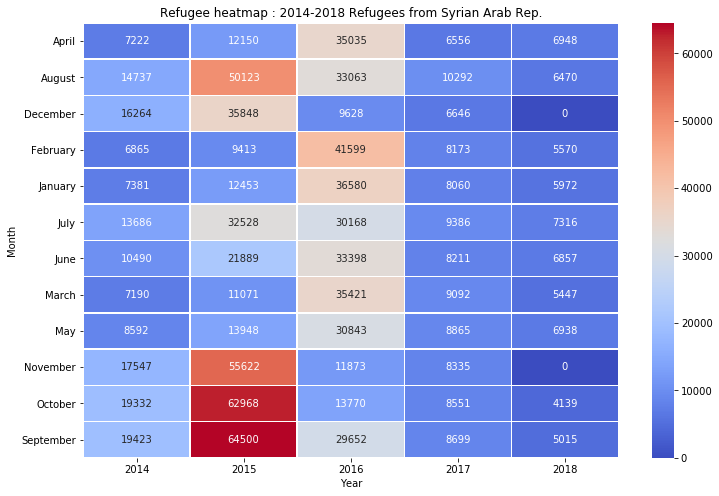

In [140]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
sns.heatmap(heatmap1_data, cmap="coolwarm", fmt="d", annot=True, linewidth=0.5, ax = ax)

ax.set_title('Refugee heatmap : 2014-2018 Refugees from Syrian Arab Rep.')
plt.show()

In [141]:
aslymData_ind_ht = aslymData_ind[aslymData_ind['Year']>2013] 

aslymData_ind_ht = aslymData_ind_ht[['Year','Month','Value']]

aslymData_ind_ht2 = aslymData_ind_ht.groupby(['Year','Month']).sum()


aslymData_ind_ht2

Value
Year Month           
2014 April        787
     August       623
     December     695
     February     643
     January      711
     July         712
     June         742
     March        719
     May          756
     November     529
     October      722
     September    665
2015 April        676
     August      1000
     December    1005
     February     605
     January      576
     July         962
     June         922
     March        645
     May          772
     November    1030
     October      977
     September    932
2016 April       1225
     August      1458
     December    1453
     February    1154
     January     1016
     July        1358
     June        1484
     March       1178
     May         1170
     November    1517
     October     1555
     September   1511
2017 April       1153
     August      1301
     December    1384
     February    1201
     January     1393
     July        1172
     June        1281
     March       1702
     May         1508
     November    1525
     October     1302
     September   1324
2018 April       1084
     August       675
     February    1535
     January     1906
     July         907
     June         951
     March       1715
     May         1032
     October       73
     September    425

In [142]:
heatmap1_data = pd.pivot_table(aslymData_ind_ht2, values='Value', 
                     index='Month', 
                     columns='Year', fill_value=0).astype(int)

heatmap1_data

Year,2014,2015,2016,2017,2018
Month,,,,,
April,787,676,1225,1153,1084
August,623,1000,1458,1301,675
December,695,1005,1453,1384,0
February,643,605,1154,1201,1535
January,711,576,1016,1393,1906
July,712,962,1358,1172,907
June,742,922,1484,1281,951
March,719,645,1178,1702,1715
May,756,772,1170,1508,1032


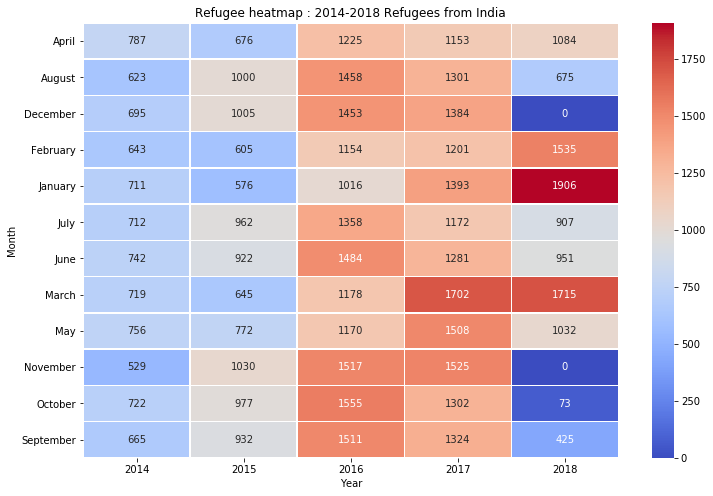

In [143]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
sns.heatmap(heatmap1_data, cmap="coolwarm", fmt="d", annot=True, linewidth=0.5, ax = ax)

ax.set_title('Refugee heatmap : 2014-2018 Refugees from India')
plt.show()

In [169]:
ind_aslm_data = aslymData_org[aslymData_org['Origin'] == 'India']

ind_aslm_data['Country / territory of asylum/residence'] = ind_aslm_data['Country / territory of asylum/residence'].str.slice(0,15)

aslymData_sry_ht = ind_aslm_data[ind_aslm_data['Year']>2008] 

ind_aslm_data = aslymData_sry_ht[['Country / territory of asylum/residence','Year','Value']]

ind_aslm_data2 = ind_aslm_data.groupby(['Country / territory of asylum/residence','Year']).sum()

ind_aslm_data2 = ind_aslm_data2[ind_aslm_data2.Value>100]



<ipython-input-169-5ff68013187e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_aslm_data['Country / territory of asylum/residence'] = ind_aslm_data['Country / territory of asylum/residence'].str.slice(0,15)


In [170]:
heatmap1_data = pd.pivot_table(ind_aslm_data2, values='Value', 
                     index='Country / territory of asylum/residence', 
                     columns='Year', fill_value=0).astype(int)



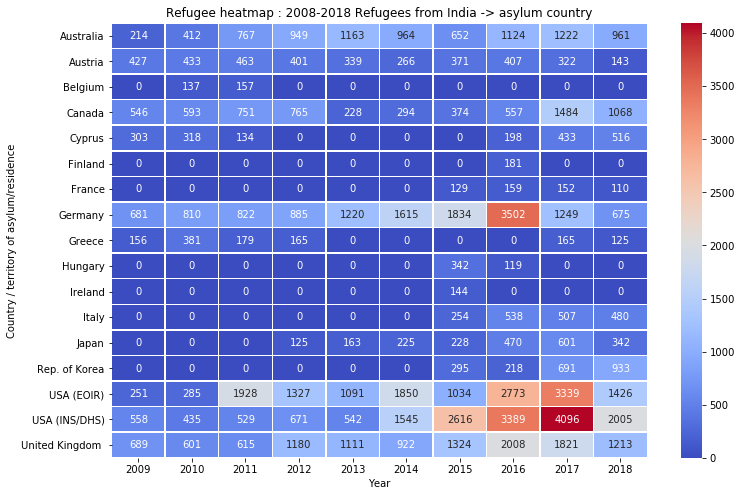

In [171]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
sns.heatmap(heatmap1_data, cmap="coolwarm", fmt="d", annot=True, linewidth=0.5, ax = ax)

ax.set_title('Refugee heatmap : 2008-2018 Refugees from India -> asylum country')
plt.show()

In [164]:
ind_aslm_data = aslymData_org[aslymData_org['Origin'] == 'India']

In [168]:
ind_aslm_data['Country / territory of asylum/residence'].str.slice(0,15)

236           Australia
237           Australia
238           Australia
239           Australia
240           Australia
              ...      
355650    USA (INS/DHS)
355651    USA (INS/DHS)
355652    USA (INS/DHS)
355653    USA (INS/DHS)
355654    USA (INS/DHS)
Name: Country / territory of asylum/residence, Length: 5128, dtype: object